# MSCA 31008 - Data Mining Assignment 3 Part 2 (Group 4)
<b>Qingwei Zhang, Jake Brewer, Prinu Mathew</b><br>
<b>Winter 2023</b>

### Import Libraries  

In [1]:
import sys, os, json, subprocess

## for data
import pandas as pd
import numpy as np
import datetime
import random

## for machine learning
from scipy import stats
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [2]:
## for machine learning
try:
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    import sklearn.datasets
        
    print("~~~ Already installed required packages for machine learning ~~~~")
except Exception as e:
    print(e)
    
    print("~~~ Installing required packages for machine learning ~~~~")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "kneed"])
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "scikit-learn"])
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    import sklearn.datasets

~~~ Already installed required packages for machine learning ~~~~


In [3]:
## for interactive visualization
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    print("~~~ Already installed required packages for interactive visualizations ~~~~")
except Exception as e:
    print(e)
    
    print("~~~ Installing required packages for interactive visualizations ~~~~")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "matplotlib"])
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "seaborn"])
    import matplotlib.pyplot as plt
    import seaborn as sns
    
%matplotlib inline

~~~ Already installed required packages for interactive visualizations ~~~~


## Functions

In [4]:
def generate_bi_plot(score, coeff, labels=None, components=[1, 2], enable_varimax = False):
    fig, ax = plt.subplots(figsize=(12, 8))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, 'Var'+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    if(enable_varimax == False):
        plt.title(f'Biplot of Principal Component {components[0]} & Principal Component {components[1]}')
    else:
        plt.title(f'Biplot of Principal Component {components[0]} & Principal Component {components[1]} after varimax rotations')
    plt.xlabel(f'PC{components[0]}')
    plt.ylabel(f'PC{components[1]}')

## 1. Read dataset
Include all variables except for MEDV (Median value of owner-occupied homes in $1000's). Since MEDV typically would be the target variable that we want to predict we should exclude it so that the clusters only consist of predictor (independent) variables.

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

In [5]:
# reading the CSV file
input_df = pd.read_csv('BostonHousing.csv', quotechar='"', delimiter = ',')
input_df.head(10)
X = input_df
input_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 1. Split Data in Train (70%) and Test (30%) and Scale It

In [6]:
# split data into training and testing and scale using the z-score (StandardScaler does this)
# pass an int to random_state for reproducible results across multiple function calls
X_train, X_test = train_test_split(X, test_size=.3, random_state=42)

scaler  = StandardScaler()
scaler.fit(X_train) # fit just to train data
X_train = scaler.transform(X_train) # transform train using fitted train
X_test = scaler.transform(X_test) # transform test using fitted train

## 2. Perform PCA on Training Data

In [7]:
train_pca = PCA(n_components=8)
train_pca.fit(X_train)
X_train_new = train_pca.fit_transform(X_train)

## 3. Generate Scree Plot for PCA

In [8]:
train_pca.explained_variance_ratio_

array([0.45791134, 0.12409927, 0.0957565 , 0.06575709, 0.05918574,
       0.05042281, 0.03780119, 0.02886136])

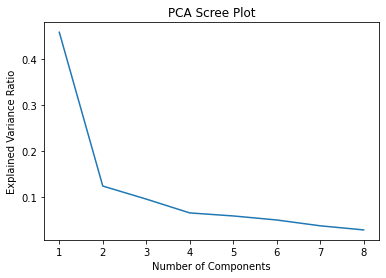

In [9]:
# scree plot
fig, ax = plt.subplots()

ax.plot(range(1, 9), train_pca.explained_variance_ratio_)
ax.set(xlabel='Number of Components', ylabel= 'Explained Variance Ratio', title='PCA Scree Plot')
plt.show()

Using the elbow method with the above scree plot it appears that <b>2</b> is the optimal number of principal components and is the point at which the explained variance ratio starts to level off. This is the point at which adding more components doesn't add much more information to the data

## 4. Plot Loading 1 against all other loadings upto 4

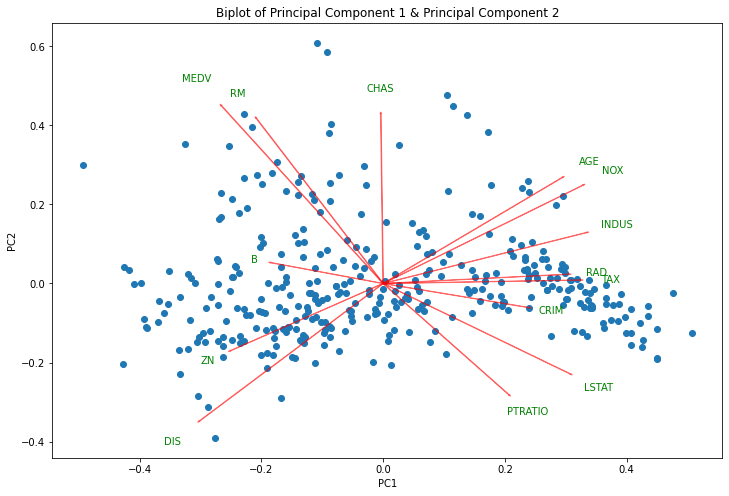

In [10]:
# PC1 & PC2
generate_bi_plot(X_train_new[:,(0, 1)], np.transpose(train_pca.components_[0:2, :]), labels=input_df.columns, components=[1, 2])

### Interpretation
The results of the biplot are pretty interesting. A few observations:
- It looks like RAD and TAX are highly correlated, while neither are correlated with CHAS. 
- AGE and NOX are correlated as well as MEDV (median price) and RM (number of rooms) which is not suprising
- MEDV and RM has a high loading on Component 2
- PTRATIO and DIS appear to be orthogonal and therefore are not correlated
- The variable "INDUS" (proportion of non-retail business acres per town) appears to have higher loading on Component 1
- The variable "RM" (average number of rooms per dwelling) has a high loading on Component 2
- The variable "LSTAT" (% lower status of the population), TAX (full-value property-tax rate per $10,000), CRIM has a high loading on Component 1
- Might interpret Component 2 as measuring the average number of rooms per dwelling and Component 1 as measuring the socio-economic status of the population
- Also might interpret Component 1 as measuring higher CRIM rates

Most of the above interpretation is similiar for below loadings

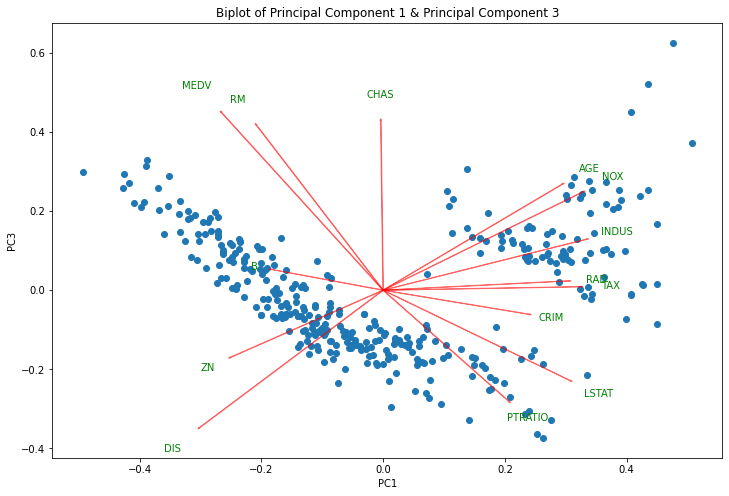

In [11]:
# PC1 & PC3
generate_bi_plot(X_train_new[:,(0, 2)], np.transpose(train_pca.components_[0:2, :]), labels=input_df.columns, components=[1, 3])

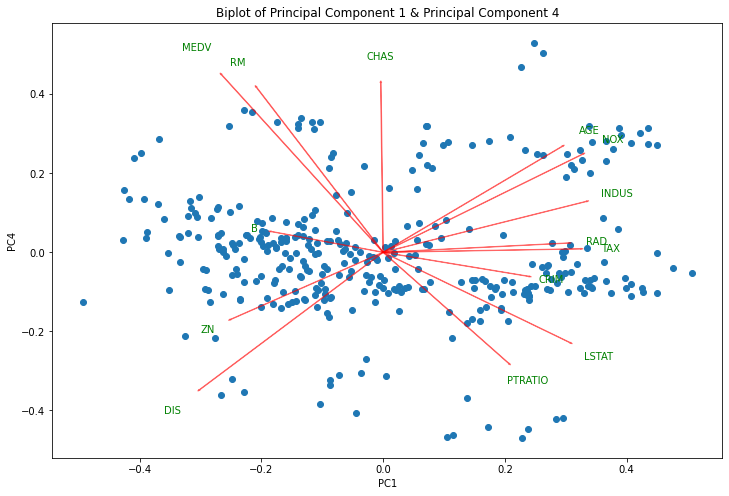

In [12]:
# PC1 & PC4
generate_bi_plot(X_train_new[:,(0, 3)], np.transpose(train_pca.components_[0:2, :]), labels=input_df.columns, components=[1, 4])

## 5. Holdout Validation Procedures

### 5.a.1 Show that loadings are orthogonal for PC1 and PC2

In [13]:
# To show that the component loadings are orthogonal, we can use the dot product of the loadings of two different components. 
# If the loadings are orthogonal, the dot product will be very close to zero.

# Get the loadings of the first two components
loadings = train_pca.components_[:2, :]

# Calculate the dot product of the loadings
dot_product = loadings[0, :].dot(loadings[1, :])

print("Dot product of component loadings:", dot_product)

Dot product of component loadings: 2.0816681711721685e-17


### 5.a.2 Show that loadings are orthogonal for all PCA's

In [14]:
# loadings - dot product = 0 (diagonals should be 1 all else should be 0)
np.dot(train_pca.components_, np.transpose(train_pca.components_)).round(4)

array([[ 1.,  0., -0., -0., -0.,  0.,  0.,  0.],
       [ 0.,  1., -0.,  0.,  0.,  0., -0.,  0.],
       [-0., -0.,  1., -0.,  0.,  0., -0., -0.],
       [-0.,  0., -0.,  1.,  0., -0.,  0., -0.],
       [-0.,  0.,  0.,  0.,  1., -0.,  0.,  0.],
       [ 0.,  0.,  0., -0., -0.,  1., -0., -0.],
       [ 0., -0., -0.,  0.,  0., -0.,  1.,  0.],
       [ 0.,  0., -0., -0.,  0., -0.,  0.,  1.]])

### 5.b.1 Show that scores are orthogonal for PC1 and PC2

In [15]:
# To show that the component scores are orthogonal, we can use the dot product of the scores of two different components. 
# If the scores are orthogonal, the dot product will be zero

# Get the scores of the first two components
scores = train_pca.transform(X_train)[:, :2]

# Calculate the dot product of the scores
dot_product = scores[:, 0].dot(scores[:, 1])

print("Dot product of component scores:", dot_product)

Dot product of component scores: 2.0435042547006788e-11


### 5.b.2 Show that scores are orthogonal for all PCA's

In [16]:
# factors - all non diagonal values in the covariance matrix are 0
np.cov(np.transpose(X_train_new)).round(4)

array([[ 6.4289,  0.    ,  0.    ,  0.    ,  0.    , -0.    , -0.    ,
        -0.    ],
       [ 0.    ,  1.7423,  0.    ,  0.    , -0.    , -0.    , -0.    ,
        -0.    ],
       [ 0.    ,  0.    ,  1.3444,  0.    ,  0.    , -0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.9232,  0.    ,  0.    , -0.    ,
         0.    ],
       [ 0.    , -0.    ,  0.    ,  0.    ,  0.8309,  0.    , -0.    ,
        -0.    ],
       [-0.    , -0.    , -0.    ,  0.    ,  0.    ,  0.7079, -0.    ,
        -0.    ],
       [-0.    , -0.    ,  0.    , -0.    , -0.    , -0.    ,  0.5307,
        -0.    ],
       [-0.    , -0.    ,  0.    ,  0.    , -0.    , -0.    , -0.    ,
         0.4052]])

##### Note that the loadings and scores are orthogonal in the sense of linear algebra, they are not necessarily independent, meaning that they don't need to contain mutually exclusive information, they are just not correlated.

### 5.c. Create manual test data and compare to actual test data

In [17]:
factor_scores = train_pca.transform(X_test)[:, 0:2]
loadings = train_pca.components_[0:2, :]
manual_data = np.dot(factor_scores, loadings)

### 5.d. Compute the Variance Account For (R2) in the Test sample. That yields a measure of Test performance

In [18]:
# correlation matrix
np.corrcoef(X_test.flatten(), manual_data.flatten())

array([[1.        , 0.76321482],
       [0.76321482, 1.        ]])

In [19]:
# note that the R2 score ranges between 0 and 1, with higher values indicating a better fit. A score close to 1 means that the model explains a 
# large proportion of the variance in the test data, while a score close to 0 means that the model does not explain much of the variance.

# compute the R2 score
r2 = np.corrcoef(X_test.flatten(), manual_data.flatten())[0, 1]**2

print("R2 Score:", r2)

R2 Score: 0.5824968677709066


### 5.e. Rotate the component loadings using varimax rotation. Look at the Loadings from the varimax rotation

In [20]:
from sklearn.utils.extmath import randomized_svd

# perform varimax rotation
# pass an int to random_state for reproducible results across multiple function calls
varimax_loadings, _, varimax_components = randomized_svd(train_pca.components_, n_components=train_pca.n_components_, random_state=42)

In [21]:
train_pca.components_[:2, :]

array([[ 0.23931363, -0.25051446,  0.3339209 , -0.00379791,  0.32811772,
        -0.20837942,  0.29445965, -0.30165107,  0.30467727,  0.32438521,
         0.20668147, -0.18395077,  0.30730618, -0.26575292],
       [-0.06088295, -0.16976441,  0.1287582 ,  0.42931793,  0.24856667,
         0.41802128,  0.26824218, -0.34772054,  0.02347459,  0.00874312,
        -0.28141733,  0.05257574, -0.22866844,  0.44979268]])

In [22]:
varimax_components[:2, :]

array([[ 0.24139809, -0.31895339,  0.13644095, -0.55731762,  0.09141865,
        -0.25340744, -0.24080447, -0.22680886, -0.11923583, -0.08798963,
        -0.4733448 , -0.05838718, -0.232707  ,  0.15874074],
       [ 0.10995915,  0.46184942, -0.1759228 , -0.27626133,  0.09965729,
        -0.0405134 ,  0.28088232,  0.12887447, -0.18611595, -0.13316808,
        -0.40898108, -0.06917285,  0.47983736, -0.32494822]])

Yes both PCA component loading and varimax rotated PCA component loading yield different Interpretation of the Principal Components

### 5.f. Plot Rotated loading 1 against all other loadings upto 3

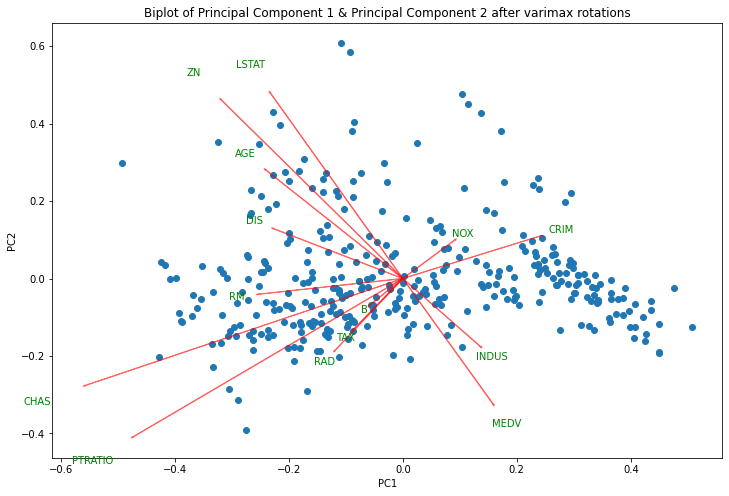

In [23]:
# PC1 & PC2
generate_bi_plot(X_train_new[:,(0, 1)], np.transpose(varimax_components[0:2, :]), labels=input_df.columns, components=[1, 2], enable_varimax = True)

### Interpretation
The results of the biplot are pretty interesting after varimax rotations. A few observations:
- It looks like RAD and TAX are highly correlated, while both are some what lesser correlated with CHAS on the component 1
- The variable "LSTAT" (% lower status of the population), AGE (proportion of owner-occupied units built prior to 1940), ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) has a high loading on Component 2. It means that the varimax rotation is making the component 2 more interpretable and isolating the effect of "LSTAT" on the component 2
- The variable "INDUS" (proportion of non-retail business acres per town) has a high loading on Component 1
- The loading of the Component 1 is high for the variable "MEDV" and "NOX" (nitric oxides concentration (parts per 10 million)), it means that the varimax rotation is making the component 1 more interpretable and isolating the effect of "NOX" on the component 1
- It looks like "INDUS" and "NOX" are concentrated on the component 1 which might explain why nitric oxides concentration is higher 
- "PTRATIO" and "MEDV" appear to be orthogonal and therefore are not correlated
- "B" and "INDUS" appear to be orthogonal and therefore are not correlated

It's worth noting that the amount of data reduction will also depend on the amount of variance explained by the retained components, which can be obtained from the explained variance ratio calculated during the PCA process. If a high percentage of variance is explained by the retained components, then the data has been reduced a lot.

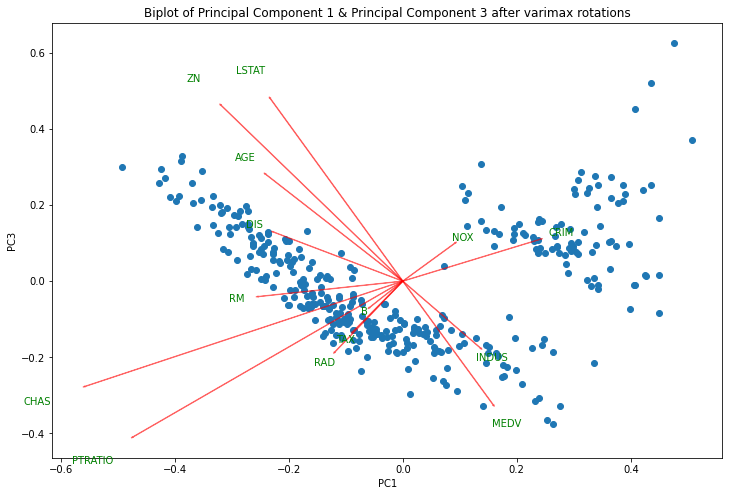

In [24]:
# PC1 & PC3
generate_bi_plot(X_train_new[:,(0, 2)], np.transpose(varimax_components[0:2, :]), labels=input_df.columns, components=[1, 3], enable_varimax = True)

In [25]:
import datetime
import pytz

datetime.datetime.now(pytz.timezone('US/Central')).strftime("%a, %d %B %Y %H:%M:%S")

'Sun, 29 January 2023 20:05:57'